# Classificazione Malattia al Cuore/Cardio Vascolari

**Programmazione di Applicazioni di Data Intensive - 2022/2023** 
Laurea in Ingegneria e Scienze Informatiche - Università di Bologna, Cesena

<p>Fabrizio Marzo - Mat: 0000998809 </p>
<p>Diego Giuseppetti- Mat: 0000988034 </p>


## Obiettivo del progetto

L'obiettivo del progetto è analizzare diversi modelli di classificazione per poter vedere se il paziente preso in esame abbia una malattia Cardiovascolare oppure No.
Tutto questo attraverso dei parametri, ottenuti da test medici efettuati dal paziente.

## Import delle librerie 

In [1]:
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import time

Data Collection and Processing, 
Loading the CSV Data to a Pandas DataFrame

In [195]:
heart_data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

Controlliamo tutte le colonne del mio DataSet.

In [3]:
heart_data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [4]:
heart_data.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


Cambio lo 1 --> Pos, 0 --> Neg 

1 --> Defective Heart --> Pos

0 --> Healthy Heart --> Neg

In [6]:
heart_data["label"] = np.where(heart_data["target"] == 1,"pos","neg")

In [7]:
heart_data = heart_data.drop(columns="target")

In [9]:
heart_data.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,label
0,40,1,2,140,289,0,0,172,0,0.0,1,neg
1,49,0,3,160,180,0,0,156,0,1.0,2,pos
2,37,1,2,130,283,0,1,98,0,0.0,1,neg
3,48,0,4,138,214,0,0,108,1,1.5,2,pos
4,54,1,3,150,195,0,0,122,0,0.0,1,neg


In [10]:
heart_data.tail(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,label
1185,45,1,1,110,264,0,0,132,0,1.2,2,pos
1186,68,1,4,144,193,1,0,141,0,3.4,2,pos
1187,57,1,4,130,131,0,0,115,1,1.2,2,pos
1188,57,0,2,130,236,0,2,174,0,0.0,2,pos
1189,38,1,3,138,175,0,0,173,0,0.0,1,neg


In [11]:
heart_data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
label                  0
dtype: int64

In [12]:
heart_data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


### Descrizione delle colonne

1. age : èta del paziente.
2. sex : Sesso del paziente (1 = Maschio, 0 = Femminia)
3. chest pain type (4 valori: ATA, NAP, ASY, TA):
   - 1 -> Typical Angina
   - 2 -> Atypical Angina
   - 3 -> Non Angina Pain
   - 4 -> Asymptomatic
4. resting bp s : Pressione arteriosa a riposo (in mm Hg al momento del ricovero in ospedale)
5. cholesterol : Colesterolo sierico in mg/dl
6. fasting blood sugar: Livello di zucchero nel sangue a digiuno > 120 mg/dl ( 1 = true, 0 = false )
7. resting ecg : Risultati elettrocardiografici a riposo ( 0 = Normale, 1 = Ha ST-T, 2 = Ipertrofia)
8. max heart rate: Frequenza cardiaca massima raggiunta
9. exercise angina : Angina indotta dall’esercizio fisico (1 = Si, 0 = NO)
10. oldpeak : Depressione ST indotta dall'esercizio fisico rispetto al riposo
11. ST slope : La pendenza del segmento ST di picco dell'esercizio (1 = up; 2 = flat; 3 = down)
12. label : ( 1 --> Defective Heart (Pos) , 0 --> Healthy Heart (Neg))

Vedo la grandezza del mio DataSet:

In [13]:
heart_data.shape

(1190, 12)

## Analisi Esplorativa

L'analisi esplorativa dei dati prevede l'utilizzo di grafici e visualizzazioni per esplorare e analizzare un set di dati. L'obiettivo è esplorare, indagare e apprendere le variabili dei dati all'interno del nostro set di dati.

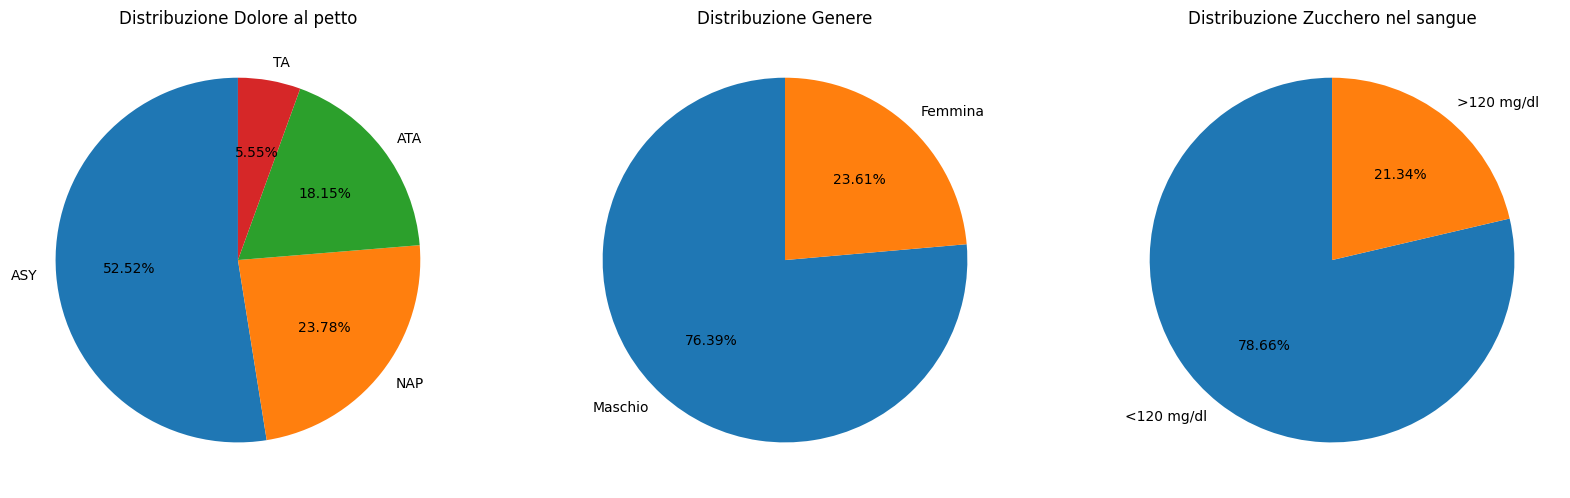

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1 , 3, 1).pie(
    heart_data["chest pain type"].value_counts(),
    labels = ["ASY","NAP","ATA","TA"],
    startangle=90,
    autopct="%.2f%%")
plt.title('Distribuzione Dolore al petto');

plt.subplot(1 , 3, 2 ).pie(
    heart_data["sex"].value_counts(),
    labels=["Maschio","Femmina"],
    startangle=90,
    autopct="%.2f%%")
plt.title('Distribuzione Genere');

plt.subplot(1,3,3).pie(
    heart_data["fasting blood sugar"].value_counts(),
    labels=["<120 mg/dl",">120 mg/dl"],
    startangle=90,
    autopct="%.2f%%")
plt.title('Distribuzione Zucchero nel sangue');

**Distribuzione Dolore al Petto**
- ASY è presente per il 52.52%, ASY sta per asintomatico che significa assenza di sintomi o quando un paziente ha una malattia ma non ne presenta i sintomi.

**Distribuzione Genere**
- Il paziente maschio occupa la maggior parte della distribuzione il 76.39%

**Distribuzione Zucchero nel sangue**
- Un livello di zucchero nel sangue a digiuno inferiore a 100 mg/dL  è considerato normale.
- Un livello di zucchero nel sangue a digiuno compreso tra 100 e 125 mg/dL è considerato pre-diabete.
- Se è pari a 126 mg/dl o superiore in due test separati, significa che una persona ha il diabete.
- La maggior parte dei pazienti presenta ancora condizioni normali e pre-diabetiche. 78,66%.

In [15]:
indexDrop = heart_data[heart_data["ST slope"]==0].index
indexDrop
heart_data.drop(indexDrop,inplace=True)

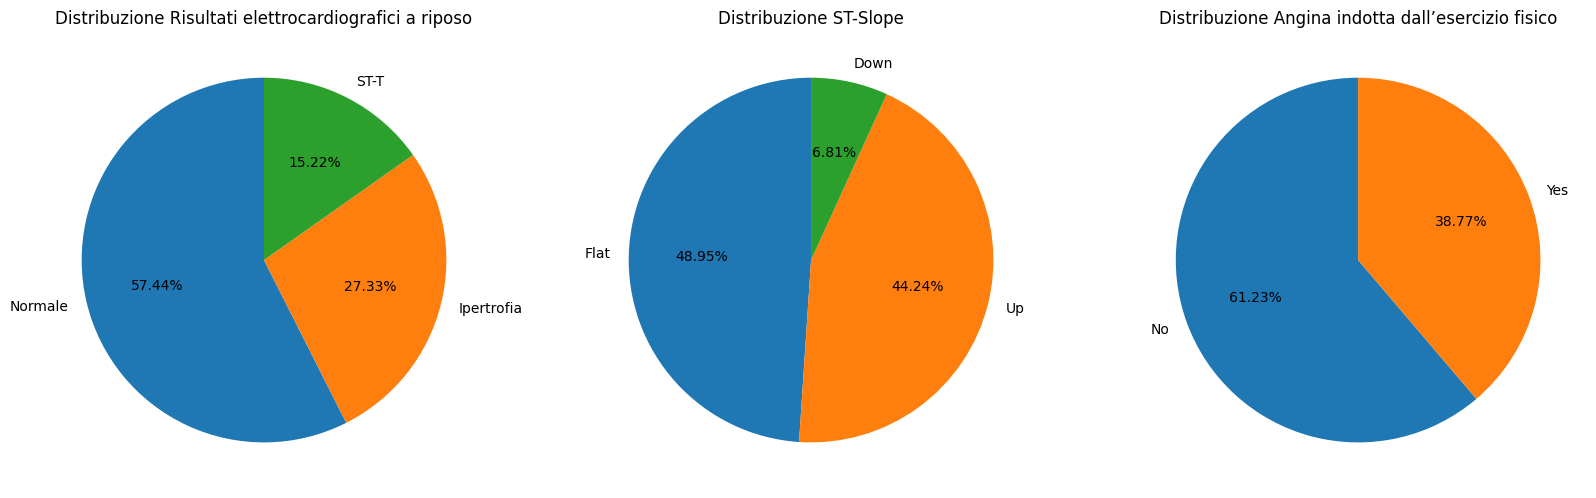

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1).pie(
    heart_data["resting ecg"].value_counts(),
     labels=["Normale","Ipertrofia","ST-T"],
     startangle=90,
    autopct="%.2f%%")
plt.title('Distribuzione Risultati elettrocardiografici a riposo');

plt.subplot(1, 3, 2).pie(
    heart_data["ST slope"].value_counts(),
     labels=["Flat","Up","Down"],
     startangle=90,
    autopct="%.2f%%")
plt.title('Distribuzione ST-Slope');

plt.subplot(1, 3, 3).pie(
    heart_data["exercise angina"].value_counts(),
     labels=["No","Yes"],
     startangle=90,
    autopct="%.2f%%")
plt.title('Distribuzione Angina indotta dall’esercizio fisico');


**Distribuzione Risultati elettrocardiografici a riposo**

- Normale : la frequenza cardiaca e il ritmo sono normali e costanti.
- ST-T : inversioni dell'onda T e/o sopraslivellamento o sottoslivellamento del tratto ST superiore a 0,05 mV.
- Ipertofia : mostrando probabile o definita ipertrofia ventricolare sinistra secondo i criteri di Estes.
- La maggior parte delle persone ha ancora risultati dell'elettrocardiogramma a riposo normale. 57.44%

**Distribuzione ST-Slope**

- Up/Upslopping: la depressione del tratto ST ascendente è associata ad un aumentato rischio di malattia coronarica.
- Down/downsloping: il sottoslivellamento del segmento ST è una manifestazione comune di grave ischemia miocardica.
- Flat: il normale segmento ST è piatto e isoelettrico.
- La distribuzione dei pazienti per la pendenza ST piana e ascendente è abbastanza uniforme < (48.95% contro 44.24%) mentre la pendenza ST discendente assume il ruolo minoritario. (solo il 6.81%)

**Distribuzione Angina indotta dall’esercizio fisico** 

- Esercizio L'angina è un dolore al petto che si manifesta con l'esercizio, lo stress o altre cose che fanno lavorare di più il cuore.
- Le distribuzioni di persone che soffrono di angina o meno. (61.23% contro 38.77%)

## Correllazione delle variabili numeriche

Analizzeremo prima la correlazione di Pearson tra tutte le nostre variabili numeriche per vedere se esiste una multicollinearità iniziale.

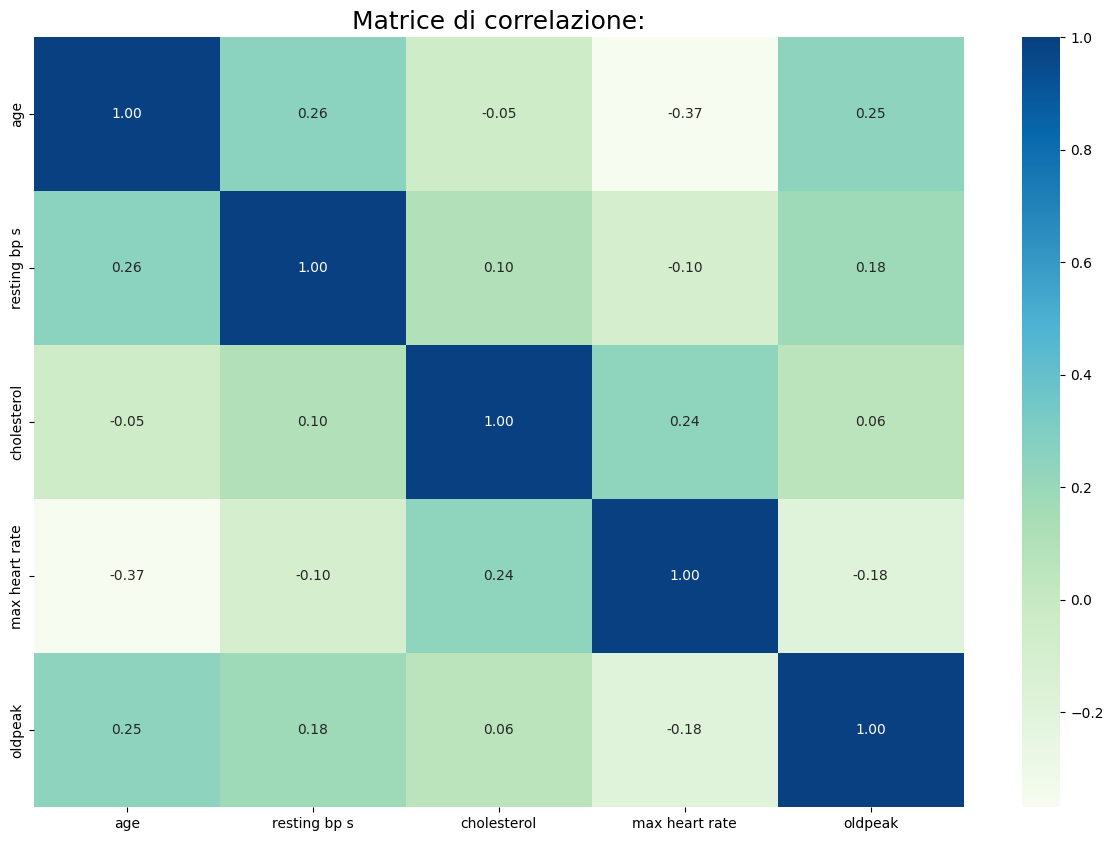

In [135]:
import seaborn as sns

heart_num = heart_data.loc[:, ['age','resting bp s','cholesterol','max heart rate','oldpeak','label']]
correlation_heartNum = heart_num.corr(method="pearson")
plt.figure(figsize=(15,10))
sns.heatmap(correlation_heartNum, annot=True, fmt=".2f" , cmap="GnBu")
plt.title("Matrice di correlazione:", fontsize=18);

Come mostrato sopra, non sono state rilevate multicollinearità poiché il punteggio più alto disponibile è compreso tra 0,4/-0,4.

#### Relazione Tra l'èta, Pressione arteriosa a riposo, Colesterolo, Frequenza cardiaca massima, Depressione ST indotta dall'esercizio fisico e Malati al cuore

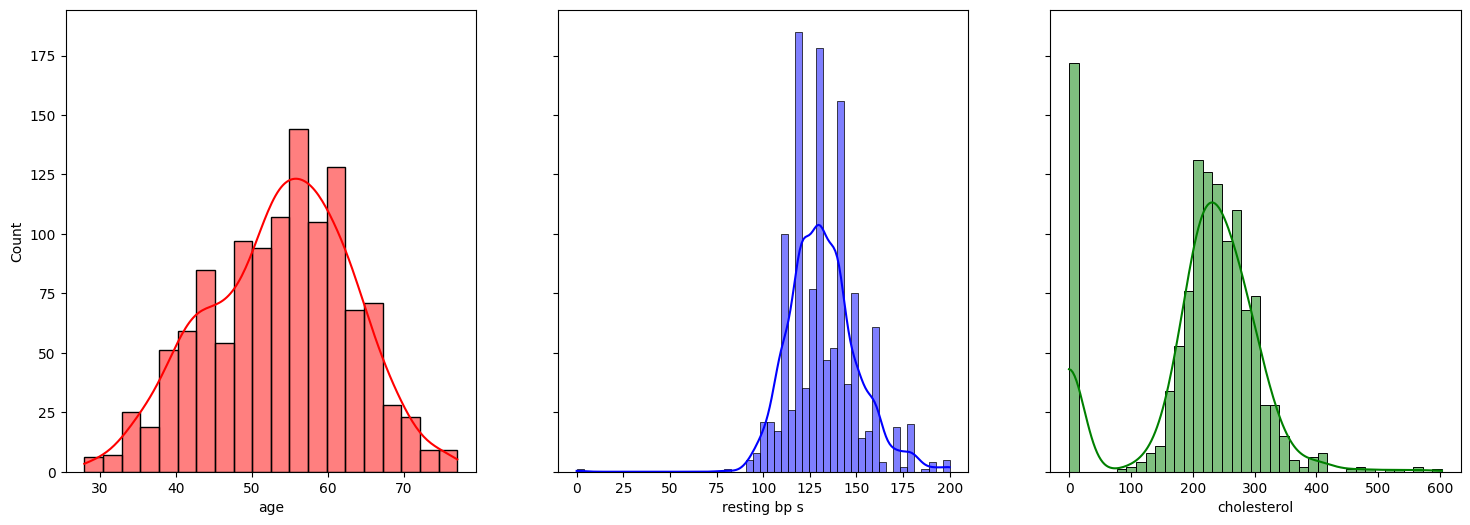

In [161]:
fig, axes = plt.subplots(1,3, figsize=(18,6), sharey=True)
sns.histplot(heart_data, ax=axes[0], x="age", kde=True , color="r" )
sns.histplot(heart_data, ax=axes[1], x="resting bp s", kde=True , color="b")
sns.histplot(heart_data, ax=axes[2], x="cholesterol", kde=True , color="g");


**Età**

- La distribuzione dell'età del paziente è abbastanza normale poiché la curva assomiglia ad una curva a campana.

**Pressione arteriosa a riposo**

- La distribuzione dei pazienti con Pressione Arteriosa a riposo mostra grafici fortemente distorti a destra.

- La maggior parte della pressione sanguigna del paziente è compresa tra 110 mm/hg e 150 mm/hg.

- Ciò potrebbe essere dovuto al fatto che sono presenti valori anomali all'interno dei valori di Pressione Arteriosa a riposo compresi tra 0 mm/hg e 60 mm/hg.


**Colesterolo sierico**

- La distribuzione dei dati del colesterolo del paziente mostra grafici fortemente distorti a sinistra.

- Inoltre, ci sono tanti valori bassi (sotto i 100 mg/dl) e anche valori 0.

- Ciò significa che ci sono valori mancanti e anche valori anomali nei dati sul colesterolo.

Per una migliore comprensione, ecco le soglie del colesterolo:

- Meno di 100 mg/dl: ottimale.
- 100-129 mg/dL: vicino o superiore al livello ottimale.
- 130-159 mg/dL: limite alto.
- 160-189 mg/dl: alto.
- 190 mg/dl e superiore: molto alto.
- In base al grafico riportato sopra, la frequenza più alta è emersa nell'intervallo 190 - 275 mg/dL. Ciò implica che la maggior parte dei pazienti ha un problema di colesterolo.

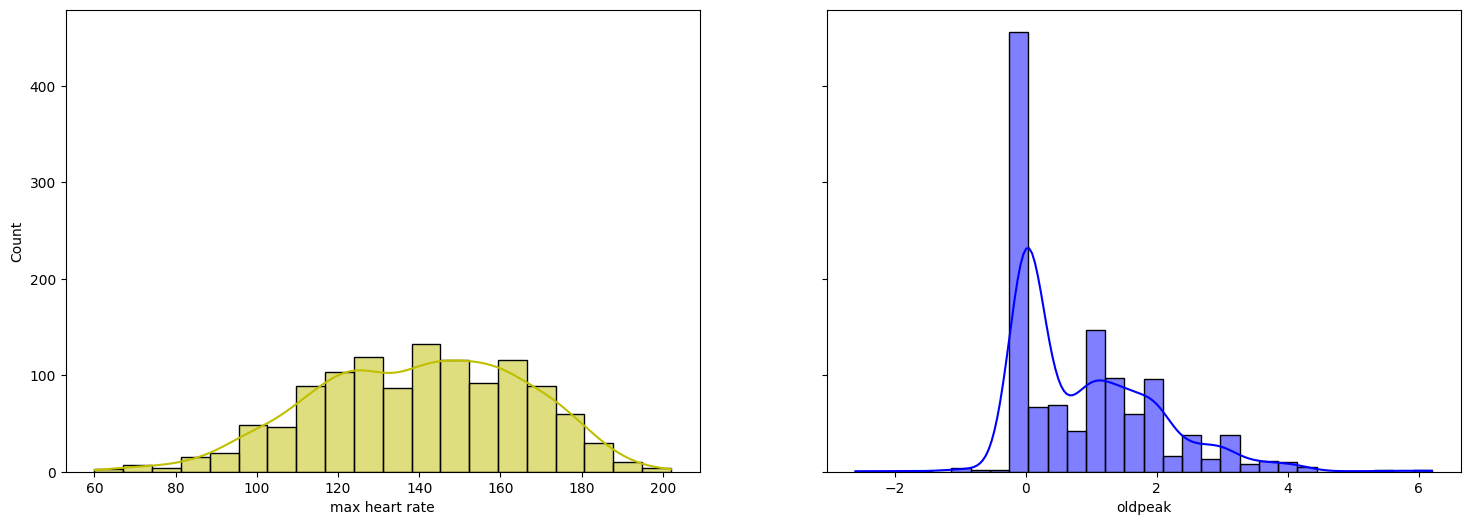

In [162]:
fig, axes = plt.subplots(1,2, figsize=(18,6), sharey=True)
sns.histplot(heart_data, ax=axes[0], x="max heart rate", kde=True , color="y")
sns.histplot(heart_data, ax=axes[1], x="oldpeak", kde=True , color="b");


**Frequenza cardiaca massima raggiunta**

- La distribuzione dei dati per la variabile MaxHR è abbastanza normale poiché la curva assomiglia ad una curva a campana.

**oldpeak** 

- La distribuzione dei dati del paziente Oldpeak mostra grafici fortemente distorti a sinistra.


## Analisi bivariata

L'analisi bivariata prevede l'analisi di due variabili.

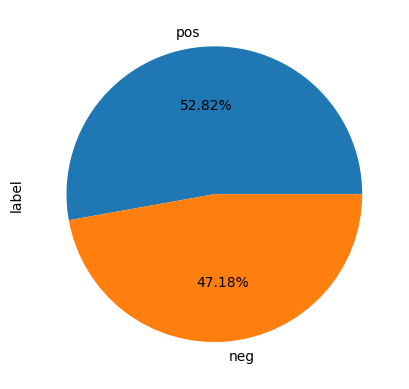

In [169]:
heart_data["label"].value_counts().plot.pie(autopct="%.2f%%");

- Il numero di pazienti che hanno una malattia cardiaca (52.82%) è più grande di quelli che non lo sono (47.18%).

- Tuttavia, la proporzione stessa delle classi è ancora classificata come equilibrata, poiché le differenze tra loro non superano il 15%.

Quindi abbbiamo un caso di classi `Bilanciate`.

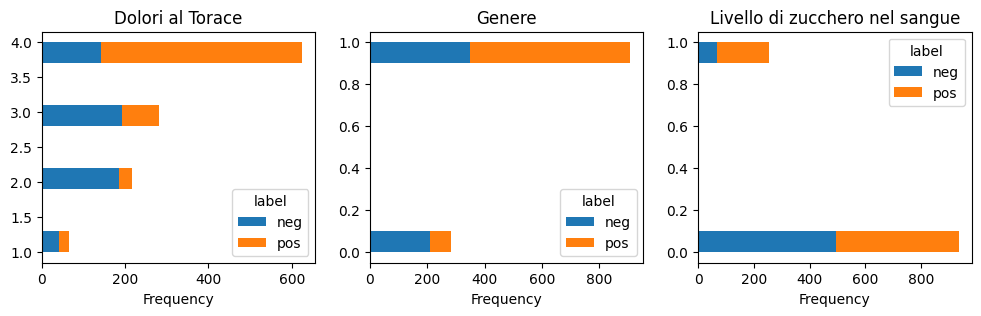

In [190]:
plt.figure(figsize=(12,3))
heart_data.pivot(columns="label")["chest pain type"].plot.hist(ax=plt.subplot(1, 3, 1), stacked=True, orientation="horizontal")
plt.title("Dolori al Torace")
heart_data.pivot(columns="label")["sex"].plot.hist(ax=plt.subplot(1, 3, 2), stacked=True, orientation="horizontal")
plt.title("Genere")
heart_data.pivot(columns="label")["fasting blood sugar"].plot.hist(ax=plt.subplot(1, 3, 3), stacked=True, orientation="horizontal")
plt.title("Livello di zucchero nel sangue");

**Dolori al Torace( 4->ASY, 3->NAP, 2->ATA, 1->TA )**

- Sorprendentemente, i pazienti che soffrono di una malattia cardiovascolare sono Assintomatici.

- Questo potrebbe essere che molte delle malattie cardiache sono causate da altri fattori. 

**Genere( 1->Maschio, 0->Femmina )**

- Gli uomini hanno un rischio maggiore di avere una malattia cardiaca rispetto le donne 

**Livello di zucchero nel sangue (1-> >120mg/dl, 0 -> <120mg/dl)**

- I pazienti con livelli di zucchero nel sangue a digiuno superiori a 120 mg/dl sono più soggetti a  malattie cardiavoascolari rispetto a quelli che non ne soffrono.

- Mentre i pazienti con un livello di zucchero nel sangue a digiuno inferiore a 120 mg/dl hanno quasi il 50 % di soffrire di malattie cardiovascolari.


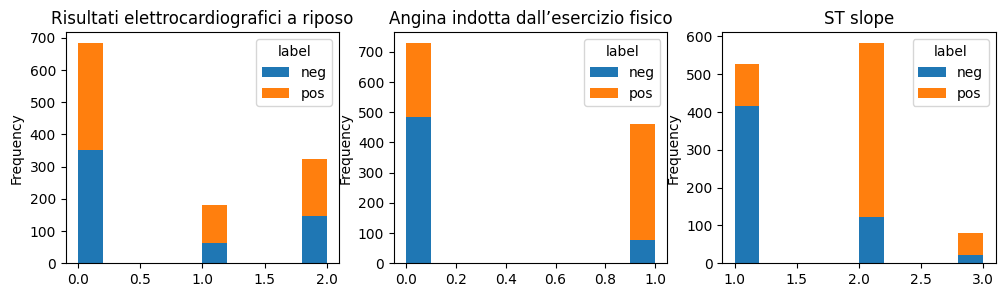

In [194]:
plt.figure(figsize=(12,3))
heart_data.pivot(columns="label")["resting ecg"].plot.hist(ax=plt.subplot(1, 3, 1), stacked=True, orientation="vertical")
plt.title("Risultati elettrocardiografici a riposo")
heart_data.pivot(columns="label")["exercise angina"].plot.hist(ax=plt.subplot(1, 3, 2), stacked=True, orientation="vertical")
plt.title("Angina indotta dall’esercizio fisico")
heart_data.pivot(columns="label")["ST slope"].plot.hist(ax=plt.subplot(1, 3, 3), stacked=True, orientation="vertical")
plt.title("ST slope");

**Risultati elettrocardiografici a riposo( 0->Normale, 1->ST-T, 2->Ipertrofia)**

- La probabilità di malattie cardiache dei pazienti con risultato dell'ECG a riposo normale è piuttosto uniforme.

- Mentre i pazienti con risultati ST e Ipertrofia presentano un rischio maggiore di malattie cardiovascolari.

**Angina indotta dall’esercizio fisico(1->SI, 0->NO)**

- I pazienti affetti da angina da sforzo sono più vulnerabili alle malattie cardiovascolari.

- Mentre i pazienti senza angina da sforzo sono relativamente più sicuri.

**ST slope( 1->UP, 2->Flat, 3->Down)**

- È interessante notare che i pazienti con pendenza ST piatta (considerati risultati normali) sono quelli maggiormente affetti da malattia cardiaca.

- Nel frattempo i pazienti con pendenza ST discendente (che è associata ad un aumentato rischio di malattia coronarica) sono quelli che sono relativamente più sicuri dalla condizione di malattia cardiaca.

- Questo potrebbe essere che molte delle malattie cardiache sono causate da altri fattori. 



**Suddivido i nostri dati in Dati di Training e Dati di Validation**

In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(heart_data,test_size=1/3, random_state=42)
x_train = train_set.drop(columns=["label"])
y_train = train_set["label"]
x_test = test_set.drop(columns=["label"])
y_test = test_set["label"]

## Logistic Regression

La regressione logistica viene utilizzata per descrivere i dati e la relazione tra una variabile dipendente e una o più variabili indipendenti. 

Valore restituito dalla regressione logistica compreso nell'intervallo 0,1. Successivamente, dobbiamo classificare noi stessi l'intervallo per convertirlo in una classe binaria.

#### Standardizzare

- Per evitare che una Feature o piu Features con ordine di grandezza diverso possa influenzare in modo Negativo le altre Feature e l'Accuratezza del modello scalo tutti i dati in un stesso Intervallo.

- Questo con "StandardScaler()"

In [29]:
from sklearn.preprocessing import StandardScaler

grid = [
    {
        "scaler": [None, StandardScaler()],
        "lr__penalty": ["none"]
    },
    {
        "scaler": [None, StandardScaler()],
        "lr__penalty": ["l2", "l1"],
        "lr__C": [0.1, 1, 10],
    },
    {
        "scaler": [None, StandardScaler()],
        "lr__penalty": ["elasticnet"],
        "lr__C": [0.1, 1, 10],
        "lr__l1_ratio": [0.2, 0.5, 0.8]
    }
]

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

lr_model = Pipeline([
    ("scaler", None),
    ("lr", LogisticRegression(solver="saga"))
])

skf = StratifiedKFold(3, shuffle=True, random_state=42)
logreg_model = GridSearchCV(lr_model, grid, cv=skf)

- Effettuiamo quindi l'addestramento sui dati di training

In [31]:
import warnings
warnings.filterwarnings('ignore') # Per evitare i warning riguardanti alla deprecazione dell'iperparametro penalty="none"
log_start_fit = time.time()
logreg_model = logreg_model.fit(x_train,y_train)
log_end_fit = time.time()
log_time_fit = log_end_fit - log_start_fit

In [32]:
logreg_model

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('lr',
                                        LogisticRegression(solver='saga'))]),
             param_grid=[{'lr__penalty': ['none'],
                          'scaler': [None, StandardScaler()]},
                         {'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2', 'l1'],
                          'scaler': [None, StandardScaler()]},
                         {'lr__C': [0.1, 1, 10],
                          'lr__l1_ratio': [0.2, 0.5, 0.8],
                          'lr__penalty': ['elasticnet'],
                          'scaler': [None, StandardScaler()]}])

In [33]:
log_time_fit

1.592146635055542

Visualizzo i migliori valori per gli iperparametri ottenuti dalla grid search.

In [34]:
print(logreg_model.best_params_)

{'lr__C': 0.1, 'lr__penalty': 'l1', 'scaler': StandardScaler()}


Osserviamo i risultati nel Test Set

In [35]:
from sklearn.metrics import f1_score, precision_score,recall_score, accuracy_score,confusion_matrix

def stats(x_test,y_test, model) :

    y_pred = model.predict(x_test)
    f1 = f1_score(y_test,y_pred,average=None)
    accS = accuracy_score(y_test,y_pred)
    preS = precision_score(y_test,y_pred, pos_label="pos") 
    recS = recall_score(y_test,y_pred,pos_label="pos")
    conM = confusion_matrix(y_test,y_pred)

    print(f"F1: {f1}")
    print(f"Accuracy Score: {accS}")
    print(f"Precision Score: {preS}")
    print(f"Recall Score: {recS}")
    print(f"Confusion Matrix: {conM}")

    return 


In [36]:
stats(x_test,y_test,logreg_model)

F1: [0.83888889 0.86635945]
Accuracy Score: 0.853904282115869
Precision Score: 0.8663594470046083
Recall Score: 0.8663594470046083
Confusion Matrix: [[151  29]
 [ 29 188]]


## Decision Tree

Decision Tree appartiene alla famiglia degli algoritmi di apprendimento supervisionato. A differenza di altri algoritmi di apprendimento supervisionato, l'algoritmo dell'albero decisionale può essere utilizzato anche per risolvere problemi di regressione e classificazione. L'obiettivo dell'utilizzo di un albero decisionale è creare un modello di training che possa essere utilizzato per prevedere la classe o il valore della variabile target apprendendo semplici regole decisionali dedotte da dati precedenti (dati di training).

In [37]:
grid = [
    {
        "scaler": [None, StandardScaler()],
        "dtree__max_depth": [2,4,6,8,10,12],
        "dtree__criterion": ["gini", "entropy"]
    }
]

In [38]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = Pipeline([
    ("scaler", None),
    ("dtree", DecisionTreeClassifier())
])

skf = StratifiedKFold(3, shuffle=True, random_state=42)
dtree_model= GridSearchCV(decision_tree, grid, cv=skf)

In [39]:
dtree_start_fit = time.time()
dtree_model = dtree_model.fit(x_train,y_train)
dtree_final_fit = time.time()
dtree_time_fit = dtree_final_fit - dtree_start_fit

In [40]:
dtree_model

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('dtree', DecisionTreeClassifier())]),
             param_grid=[{'dtree__criterion': ['gini', 'entropy'],
                          'dtree__max_depth': [2, 4, 6, 8, 10, 12],
                          'scaler': [None, StandardScaler()]}])

In [41]:
dtree_time_fit

0.5989885330200195

In [42]:
print(dtree_model.best_params_)

{'dtree__criterion': 'gini', 'dtree__max_depth': 10, 'scaler': StandardScaler()}


In [43]:
stats(x_test,y_test,dtree_model)

F1: [0.85       0.87557604]
Accuracy Score: 0.8639798488664987
Precision Score: 0.8755760368663594
Recall Score: 0.8755760368663594
Confusion Matrix: [[153  27]
 [ 27 190]]


## Random Forest

La foresta casuale è un algoritmo di apprendimento automatico, che combina l'output di più alberi decisionali per raggiungere un unico risultato

In [44]:
grid = [
    {
        "scaler": [None, StandardScaler()],
        "rforest__max_depth": [2,4,6,8,10,12],
        "rforest__criterion": ["gini", "entropy"]
    }
]

In [45]:
from sklearn.ensemble import RandomForestClassifier

random_forest = Pipeline([
    ("scaler", None),
    ("rforest", RandomForestClassifier())
])

skf = StratifiedKFold(3, shuffle=True, random_state=42)
rforest_model = GridSearchCV(random_forest, grid, cv=skf)

In [46]:
rforest_start_fit = time.time()
rforest_model = rforest_model.fit(x_train,y_train)
rforest_end_fit = time.time()
rforest_time_fit = rforest_start_fit - rforest_end_fit

In [47]:
rforest_model

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('rforest', RandomForestClassifier())]),
             param_grid=[{'rforest__criterion': ['gini', 'entropy'],
                          'rforest__max_depth': [2, 4, 6, 8, 10, 12],
                          'scaler': [None, StandardScaler()]}])

In [48]:
rforest_time_fit

-18.517847776412964

In [49]:
print(rforest_model.best_params_)

{'rforest__criterion': 'gini', 'rforest__max_depth': 12, 'scaler': StandardScaler()}


In [50]:
stats(x_test,y_test,rforest_model)

F1: [0.90704225 0.92482916]
Accuracy Score: 0.9168765743073047
Precision Score: 0.9144144144144144
Recall Score: 0.9354838709677419
Confusion Matrix: [[161  19]
 [ 14 203]]


## K-Nearest Neighbors

Il k-Nearest Neighbors è un classificatore di apprendimento supervisionato e non parametrico, che utilizza la prossimità per effettuare classificazioni sul raggruppamento di un singolo punto. K-NN parte dal presupposto che punti simili possano essere trovati uno vicino all'altro.

In [51]:
grid = [
    {
        "scaler": [None, StandardScaler()],
        "knc__n_neighbors": [1, 5, 10],
    }
]

In [52]:
from sklearn.neighbors import KNeighborsClassifier

k_NearestNeighbors = Pipeline([
    ("scaler", None),
    ("knc", KNeighborsClassifier())
])

skf = StratifiedKFold(3, shuffle=True, random_state=42)
knc_model = GridSearchCV(k_NearestNeighbors, grid, cv=skf)

In [53]:
knc_start_fit = time.time()
knc_model = knc_model.fit(x_train,y_train)
knc_end_fit = time.time()
knc_time_fit = knc_end_fit - knc_start_fit

In [54]:
knc_model

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('knc', KNeighborsClassifier())]),
             param_grid=[{'knc__n_neighbors': [1, 5, 10],
                          'scaler': [None, StandardScaler()]}])

In [55]:
knc_time_fit

0.39986085891723633

In [56]:
print(knc_model.best_params_)

{'knc__n_neighbors': 1, 'scaler': StandardScaler()}


In [57]:
stats(x_test,y_test,knc_model)

F1: [0.86021505 0.87677725]
Accuracy Score: 0.8690176322418136
Precision Score: 0.9024390243902439
Recall Score: 0.8525345622119815
Confusion Matrix: [[160  20]
 [ 32 185]]


## XGBoost

In [58]:
grid = [
    {
        "scaler": [None, StandardScaler()],
        'xgb__learning_rate': [0.01, 0.1],
        'xgb__subsample': [0.5, 1],
        'xgb__alpha': [0, 1],
        'xgb__lambda': [0, 1]
    }
]

In [59]:
from xgboost import XGBClassifier

xgBoost = Pipeline([
    ("scaler", None),
    ("xgb", XGBClassifier(objective="binary:logistic", random_state=42))
])

skf = StratifiedKFold(3, shuffle=True, random_state=42)
xgb_model = GridSearchCV(xgBoost, grid, cv=skf)

In [60]:
xgb_start_fit = time.time()
xgb_model = xgb_model.fit(x_train,y_train)
xgb_end_fit = time.time()
xgb_time_fit = xgb_end_fit -xgb_start_fit

In [61]:
xgb_model

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             param_grid=[{'scaler': [None, StandardScaler()],
                          'xgb__alpha': [0, 1], 'xgb__lambda': [0, 1],
                          'xgb__learning_rate': [0.01, 0.1],
                          'xgb__subsample': [0.5, 1]}])

In [62]:
xgb_time_fit

7.023411512374878

In [133]:
print(xgb_model.best_params_)

{'scaler': StandardScaler(), 'xgb__alpha': 0, 'xgb__lambda': 0, 'xgb__learning_rate': 0.1, 'xgb__subsample': 0.5}


In [134]:
stats(x_test,y_test,xgb_model)

F1: [0.88705234 0.90487239]
Accuracy Score: 0.8967254408060453
Precision Score: 0.9112149532710281
Recall Score: 0.8986175115207373
Confusion Matrix: [[161  19]
 [ 22 195]]


## SVM (Support Vector Machine)

In [126]:
grid = [
    {
        "scaler": [None, StandardScaler()],
        "svc__kernel": ["linear"],
        "svc__C": [0.1,1,10]
    },
    {
        "scaler": [None, StandardScaler()],        
        "svc__kernel": ["poly"],
        "svc__degree": [2,5],
        "svc__C": [0.1,1,10],
    },
    {
        "scaler": [None, StandardScaler()],
        "svc__kernel": ["rbf"],
        "svc__C": [0.1,1,10],
        "svc__gamma" :[0.1,1,10]
    }
]

In [127]:
from sklearn.svm import SVC

support_vector_machine = Pipeline([
    ("scaler", None),
    ("svc",SVC(random_state=42))
])

skf = StratifiedKFold(3,shuffle=True,random_state=42)
svm_model = GridSearchCV(support_vector_machine,grid,cv=skf)

In [128]:
svm_start_fit = time.time()
svm_model = svm_model.fit(x_train,y_train)
svm_end_fit = time.time()
svm_time_fit = svm_end_fit - svm_start_fit

In [129]:
svm_model

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('svc', SVC(random_state=42))]),
             param_grid=[{'scaler': [None, StandardScaler()],
                          'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear']},
                         {'scaler': [None, StandardScaler()],
                          'svc__C': [0.1, 1, 10], 'svc__degree': [2, 5],
                          'svc__kernel': ['poly']},
                         {'scaler': [None, StandardScaler()],
                          'svc__C': [0.1, 1, 10], 'svc__gamma': [0.1, 1, 10],
                          'svc__kernel': ['rbf']}])

In [130]:
svm_time_fit

58.02326989173889

In [131]:
print(svm_model.best_params_)

{'scaler': StandardScaler(), 'svc__C': 1, 'svc__degree': 5, 'svc__kernel': 'poly'}


In [132]:
stats(x_test,y_test,svm_model)

F1: [0.87603306 0.89559165]
Accuracy Score: 0.8866498740554156
Precision Score: 0.9018691588785047
Recall Score: 0.8894009216589862
Confusion Matrix: [[159  21]
 [ 24 193]]


Poiché stiamo parlando di previsione della diagnosi sanitaria, vogliamo ridurre al minimo il nostro errore sulla previsione di risultati positivi. Che nel nostro caso riguarda un paziente affetto da una malattia cardiovascolare. Pertanto, se esaminiamo la valutazione delle prestazioni del nostro modello, vogliamo utilizzare un modello con un buon punteggio di sensibilità.

In questo modo, dei 6 modelli che abbiamo creato, quello con il punteggio di sensibilità più elevato è il modello `Random Forest` con un valore dell'91%. Quindi possiamo concludere che, in questo caso,il Radom Forest si è dimostrato migliore per classificare le condizioni delle malattie cardiache piuttosto che il modello K-NN, regressione logistica e Decision Tree, XGBoost e SVM.

Il peggiore di tutti in base al tempo impiegato per l'addestramento è il  `SVM` ben 58 secondi.

Invece il peggiore per accuratezza è la `Logistic Regression` con soli il 85% di accuratezza rispetto ai altri modelli presi in esame. 